# Linear Regression Using California Housing dataset in Sklearn

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
### importing the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names
df["Price"] = housing.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [3]:
### performing explanatory Data analysis
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

C:\Users\Bolu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



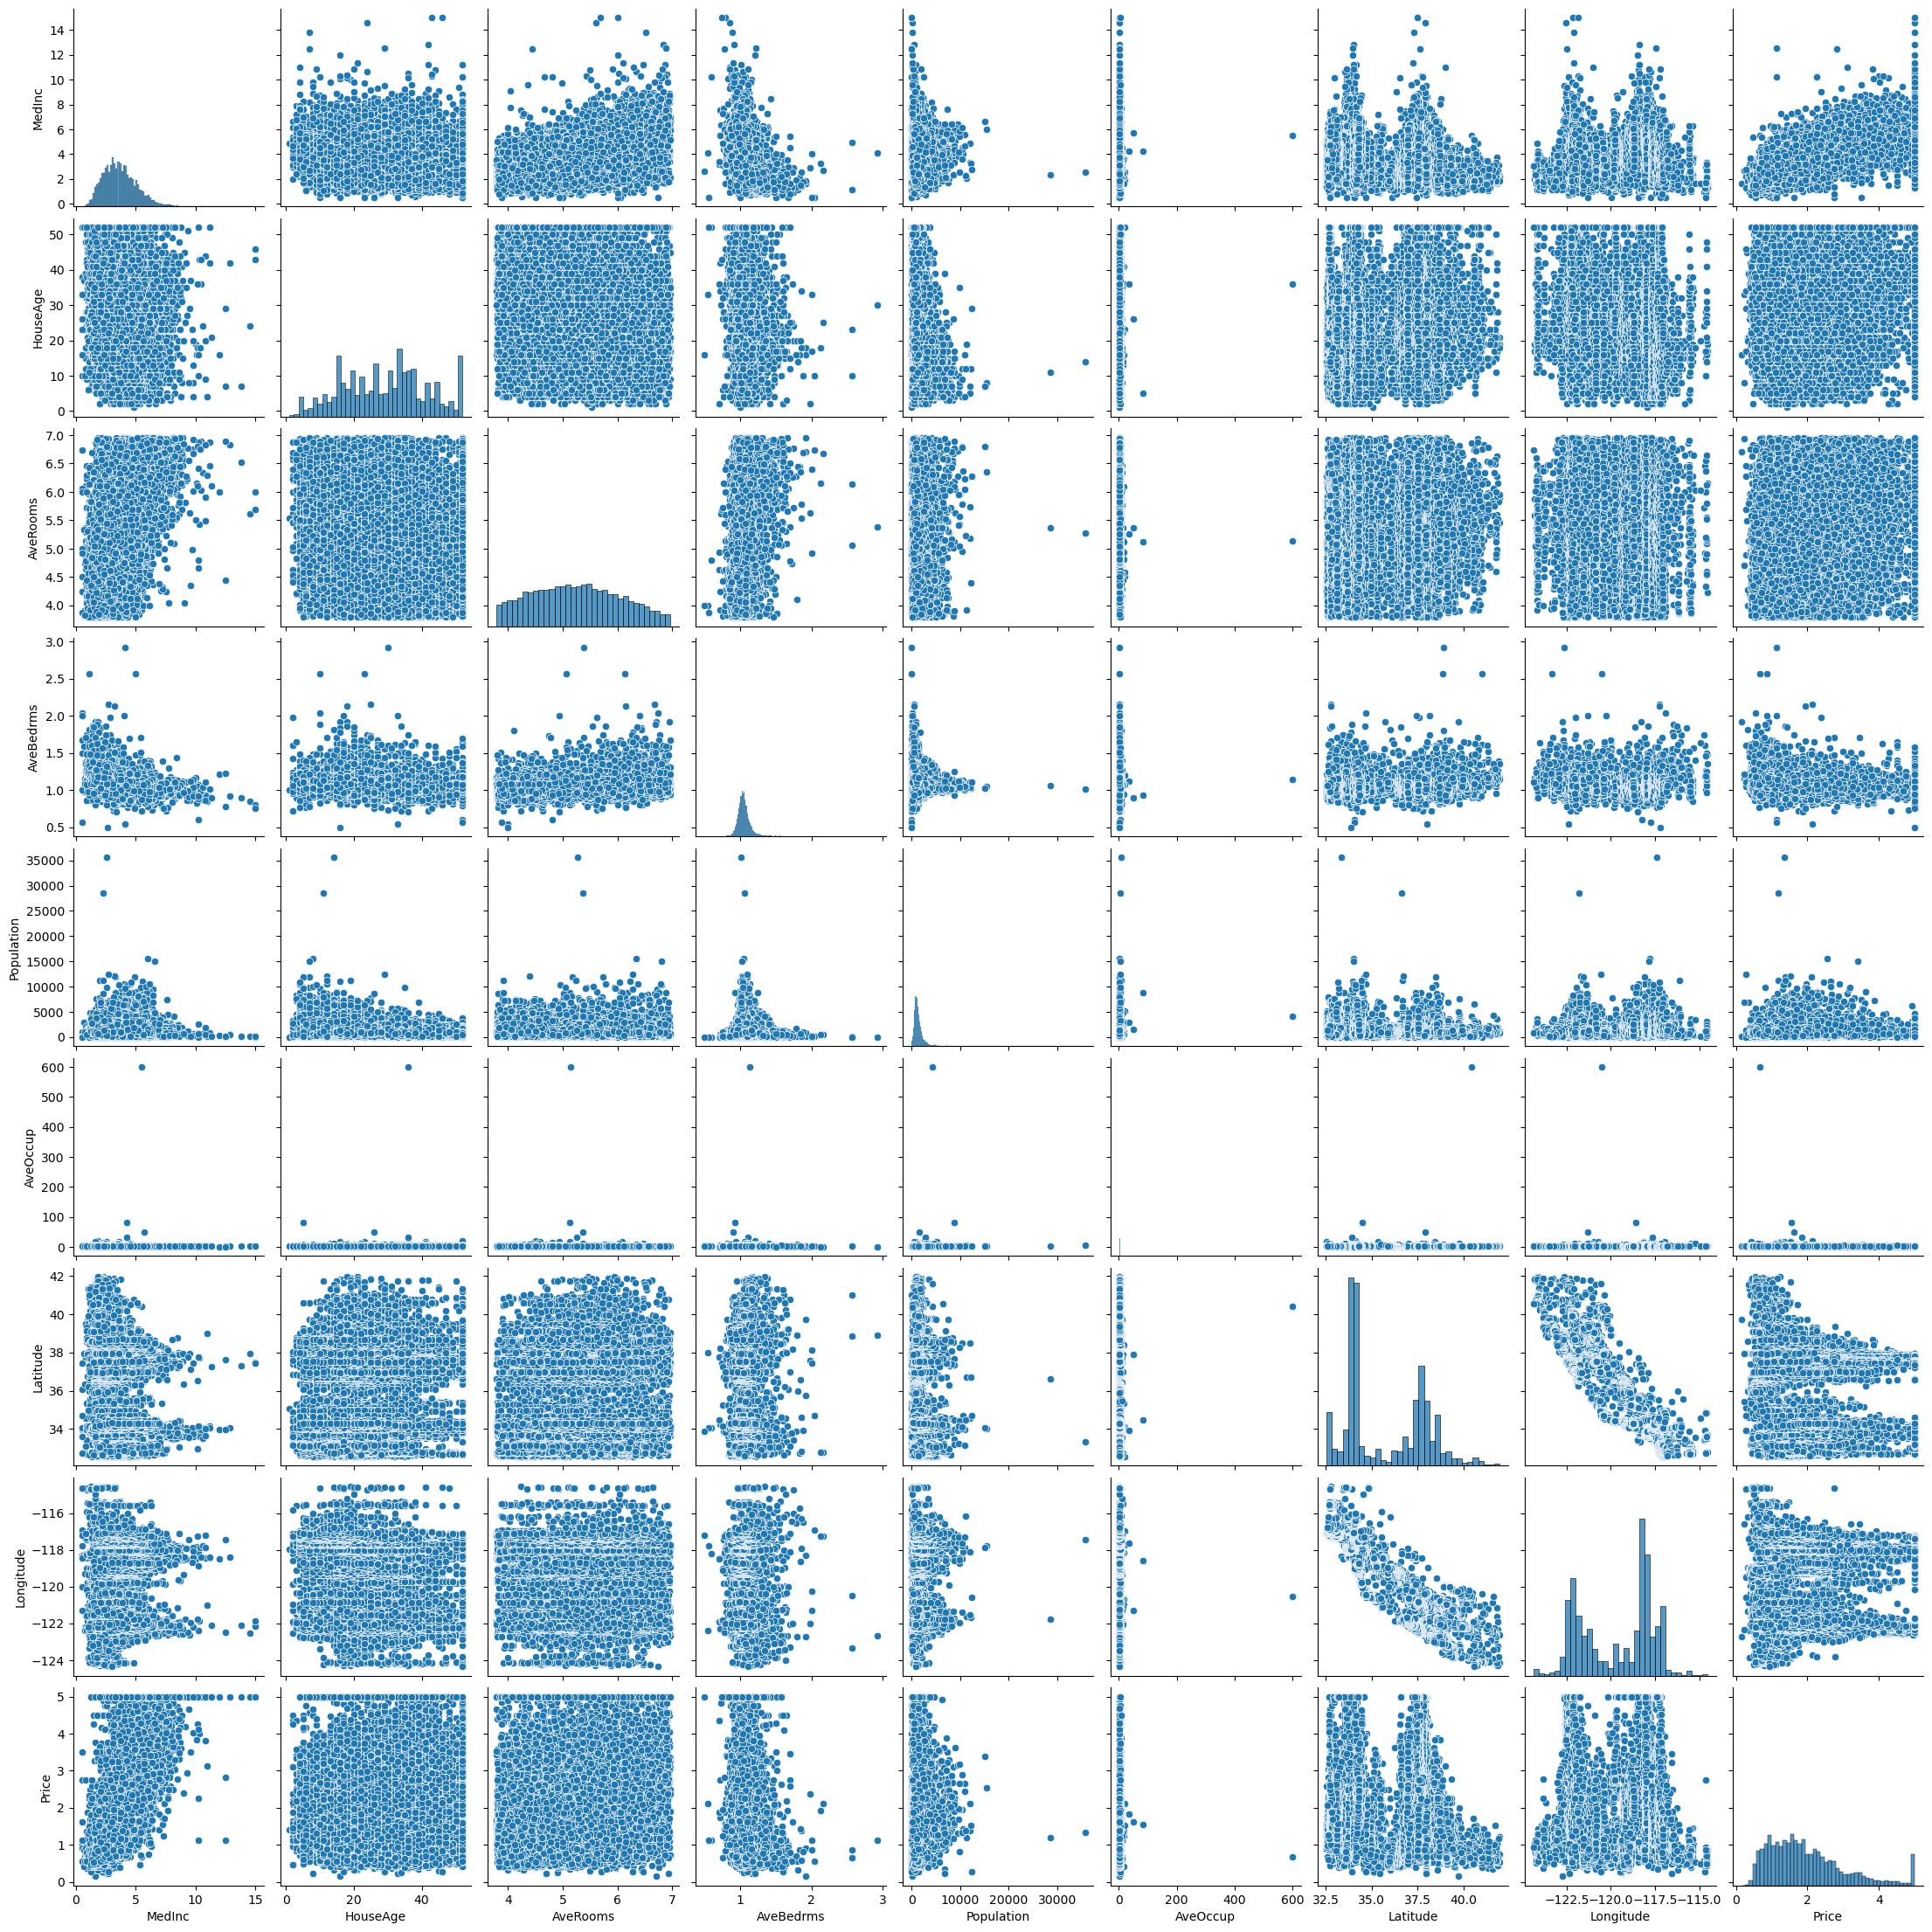

In [83]:
sns.pairplot(df)

The dataset consists of only numerical fatures with varying scales and distributions. We have observed outliers in some features, which could potentially affecr the performance of our machine learning models

<Axes: >

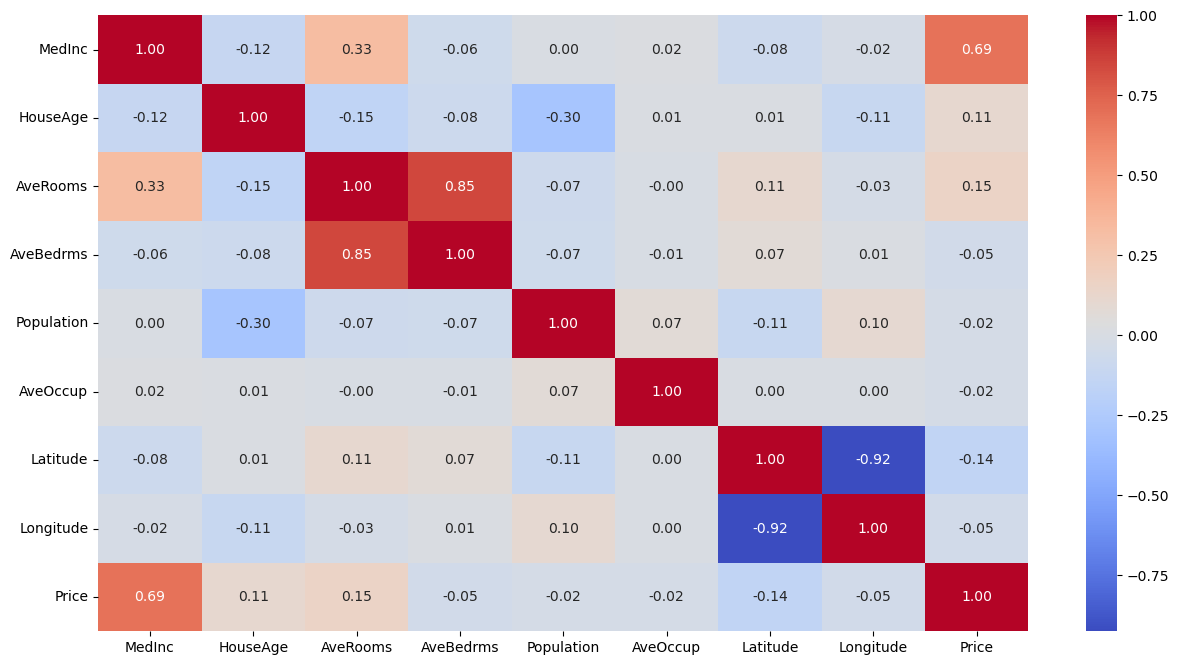

In [89]:
## checking the correlation between the predictor variables and the response variable
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

 our heatmap reveals that Medinc (median income in block group) exhibits the strongest positive correlation with our response variable, price. Additionally, our plot demonstrates notable correlations among several predictor variables. This prompts the question: are these correlations significant enough to induce multicollinearity among variables? To address this inquiry comprehensively, further analysis is needed.

In [119]:
##we can check for multicollinearity using the variance_inflation_factor() from statsmodels
## for multicollinearity not to be present, the vif value must be between 1 and 5VIF
## ignore the Vif value for the intercept
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X = dmatrices("Price ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup +Latitude + Longitude" , data = df, return_type = "dataframe")
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


variable           VIF
0   Intercept  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263

After conducting additional analysis, we identified that some of our features exhibit a Variance Inflation Factor (VIF) exceeding the threshold we set, with values as high as 9.3. However, given the primary objective of our project, which is to predict house prices, I have decided to retain all the features. This decision is based on the understanding that the elevated VIF values do not significantly impact our ability to make accurate predictions.

In [87]:
### Little detour before we proceed to creating our algorithm
import plotly.express as px
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= "Latitude",
    lon= "Longitude",
    width=800,  # Width of map
    height=800,  # Height of map
    color= "Price",
    hover_data=["Price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

From the image above, there is a correlation between the proximity to the coast and the price of houses. Specifically, as we move closer to the coast, the prices of houses tend to increase

In [ ]:
### house price prediction using linear,Ridge and lasso and picking the one that has the least amount of error

In [121]:
## splitting our data into training set and test set
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [122]:
### standardizing our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
##linear regression
## importing our necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
linear = LinearRegression().fit(X_train, y_train)
mse = cross_val_score(linear, X_train,y_train,scoring = "neg_mean_absolute_error", cv = 5)
mean_mse = np.mean(mse)
mean_mse



-0.5290616504679442

Text(0.5, 1.0, 'Actual vs. Predicted Values (Linear Regression)')

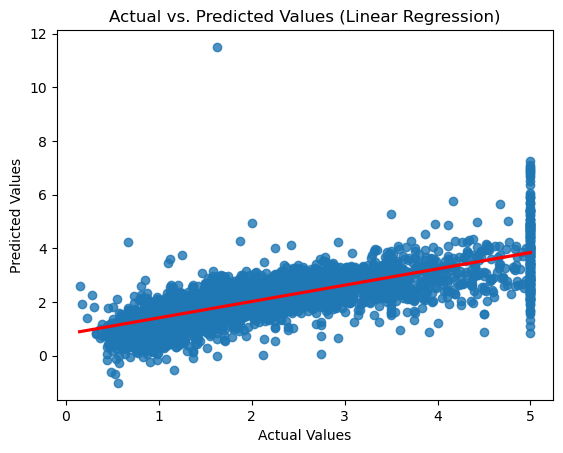

In [125]:
# Predict on the test set
y_pred = linear.predict(X_test)

# Create a scatter plot of actual vs. predicted values
sns.regplot(x = y_test, y = y_pred, line_kws=dict(color="r"))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')

In [126]:
###Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameter = {'alpha': [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1,1, 10] }
ridge_regress = GridSearchCV(ridge, parameter, scoring = "neg_mean_absolute_error", cv = 5)
ridge_regress.fit(X_train, y_train)
best_score = ridge_regress.best_score_
best_parameter = ridge_regress.best_params_
print(best_score)
print(best_parameter)

-0.5290211144218636
{'alpha': 10}


Text(0.5, 1.0, 'Actual vs. Predicted Values (Linear Regression)')

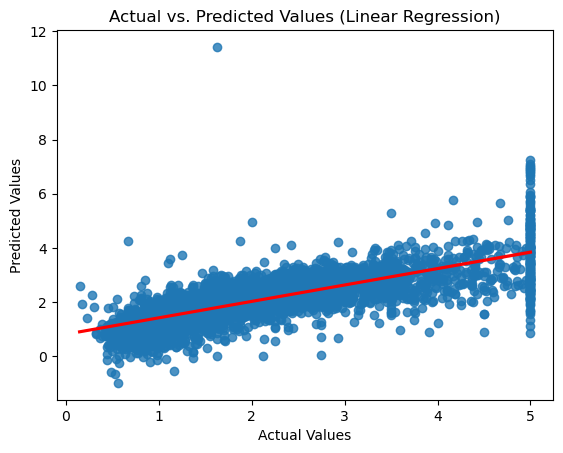

In [127]:
best_model = ridge_regress.best_estimator_
ridge_pred = best_model.predict(X_test)
# Create a scatter plot of actual vs. predicted values
sns.regplot(x = y_test, y = ridge_pred, line_kws=dict(color="r"))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')

In [131]:
###Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameter = {'alpha': [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1,1, 10] }
lasso_regress = GridSearchCV(lasso, parameter, scoring = "neg_mean_absolute_error", cv = 5)
lasso_regress.fit(X_train, y_train)
best_score = lasso_regress.best_score_
best_parameter = lasso_regress.best_params_
print(best_score)
print(best_parameter)

-0.529061653442963
{'alpha': 1e-07}


Text(0.5, 1.0, 'Actual vs. Predicted Values (Linear Regression)')

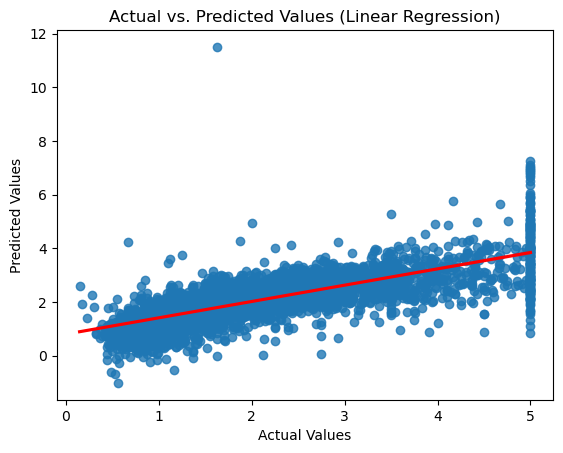

In [132]:
best_model = lasso_regress.best_estimator_
lasso_pred = best_model.predict(X_test)
# Create a scatter plot of actual vs. predicted values
sns.regplot(x = y_test, y = lasso_pred, line_kws=dict(color="r"))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')

In [150]:
pred_df = pd.DataFrame()
pred_df["Actual value"] = y_test
pred_df["Predicted value"] = lasso_pred
pred_df = pred_df.reset_index()
pred_df.drop(columns = "index", inplace= True)
pred_df

Actual value  Predicted value
0          0.47700         0.719124
1          0.45800         1.764016
2          5.00001         2.709657
3          2.18600         2.838926
4          2.78000         2.604657
...            ...              ...
4123       2.63300         1.991747
4124       2.66800         2.249838
4125       5.00001         4.468770
4126       0.72300         1.187512
4127       1.51500         2.009402

[4128 rows x 2 columns]